In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
Data = pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv")
Data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


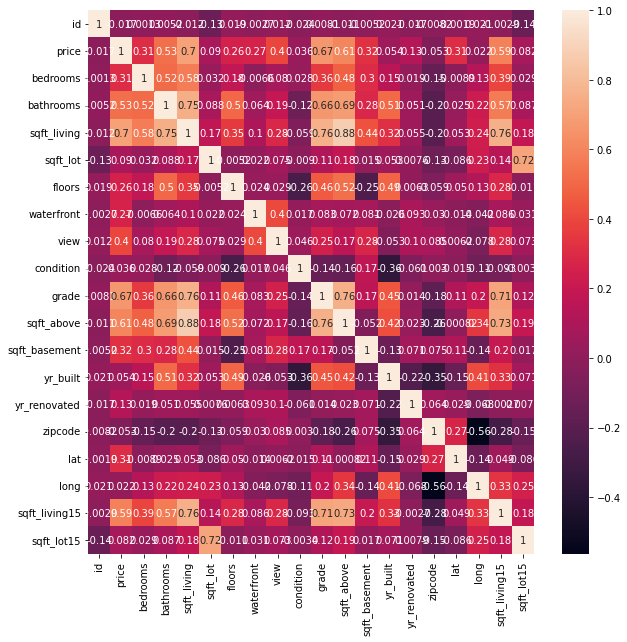

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(Data.corr(),annot=True)

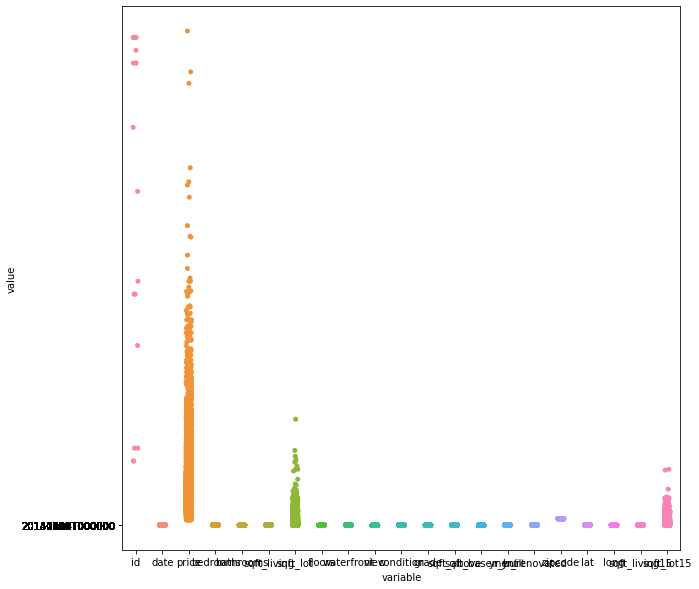

In [6]:
sns.stripplot(x='variable',y='value',data=pd.melt(Data))
plt.show()

In [23]:
X= Data[['bedrooms','bathrooms','sqft_living','floors','grade','sqft_lot']].values
y= Data['price'].values

In [24]:
print(X.shape)
print(y.shape)

(21613, 6)
(21613,)


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)


LinearRegression()

In [27]:
y_pred =pol_reg.predict(x_poly)
y_pred

array([377882.96617732, 462407.49708715, 337726.99511677, ...,
       367777.18692746, 446065.91729568, 368381.97509897])

In [28]:
import numpy as np
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y,y_pred)))

Mean Absolute Error: 173258.9743023289
Mean Squared Error: 92361148067.14873
Root Mean Squared Error: 303909.7696145169


In [34]:
pol_reg.predict(poly_reg.fit_transform(X))

array([377882.96617732, 462407.49708715, 337726.99511677, ...,
       367777.18692746, 446065.91729568, 368381.97509897])

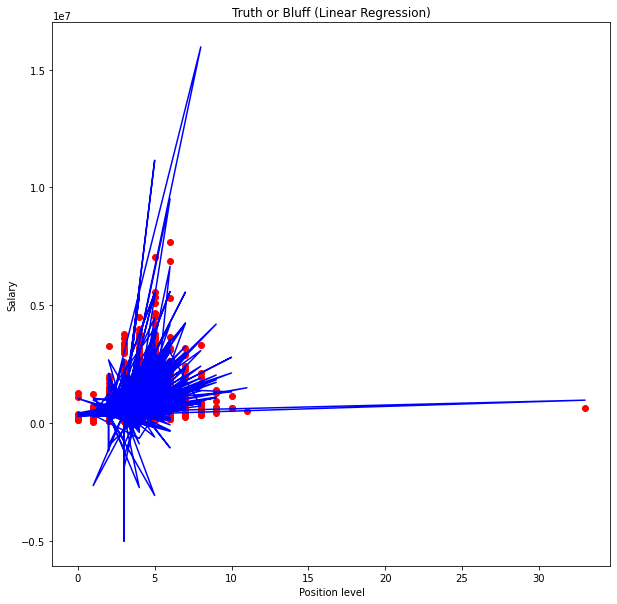

In [45]:
def polymonial():
	plt.scatter(X[:,0],y, color='red')
	plt.plot(X[:,0], pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
	plt.title('Truth or Bluff (Linear Regression)')
	plt.xlabel('Position level')
	plt.ylabel('Salary')
	plt.show()
	return
polymonial()



In [49]:
score = pol_reg.score(x_poly,y)
print(score)
print(score*100,"%")

0.31470699085179754
31.470699085179753 %
